In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

In [3]:
data = np.load("lora_AB_matrices.npz")
X_A = data["X_A"]
X_B = data["X_B"]
groups = data["groups"]

print(X_A.shape, X_B.shape)

(192, 8192) (192, 8192)


In [11]:
# text_labels = np.repeat(["sub-lora1", "sub-lora2", "sub-lora3", "sub-lora4"], 48)
# 
# # 定义保存函数
# def save_to_csv(data_matrix, prefix):
#     df = pd.DataFrame(data_matrix, columns=[f"{prefix}_feature_{i}" for i in range(data_matrix.shape[1])])
#     df["sub_lora_group"] = text_labels  # 列名明确语义
#     df.to_csv(f"lora_{prefix}_matrices.csv", index=False)
# 
# save_to_csv(X_A, "A")
# save_to_csv(X_B, "B")
# 


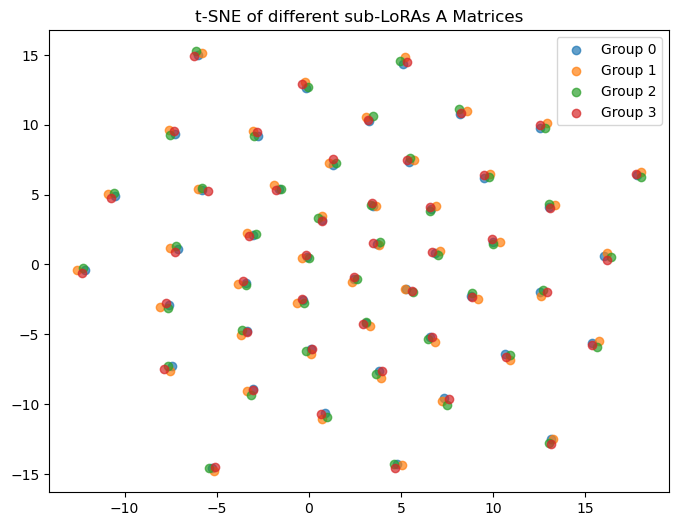

In [21]:
from sklearn.preprocessing import StandardScaler
X_A_scaled = StandardScaler().fit_transform(X_A)

colors = {
    'sub-lora1': '#1f77b4',  # 蓝色
    'sub-lora2': '#ff7f0e',  # 橙色
    'sub-lora3': '#2ca02c',  # 绿色
    'sub-lora4': '#d62728'   # 红色
}



# 执行t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=25,      # 根据样本量调整（192样本建议20-30）
    n_iter=1500,        # 增加迭代次数确保收敛
    random_state=42,    # 固定随机性
    init='pca',         # 使用PCA初始化提升稳定性
    learning_rate=200   # 平衡速度与精度
)
X_tsne = tsne.fit_transform(X_A_scaled)

# 可视化（按组着色）
plt.figure(figsize=(8, 6))
for group_id in range(4):
    mask = groups == group_id
    
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                label=f"Group {group_id}", alpha=0.7)
plt.title("t-SNE of different sub-LoRAs A Matrices")
plt.legend()
plt.show()

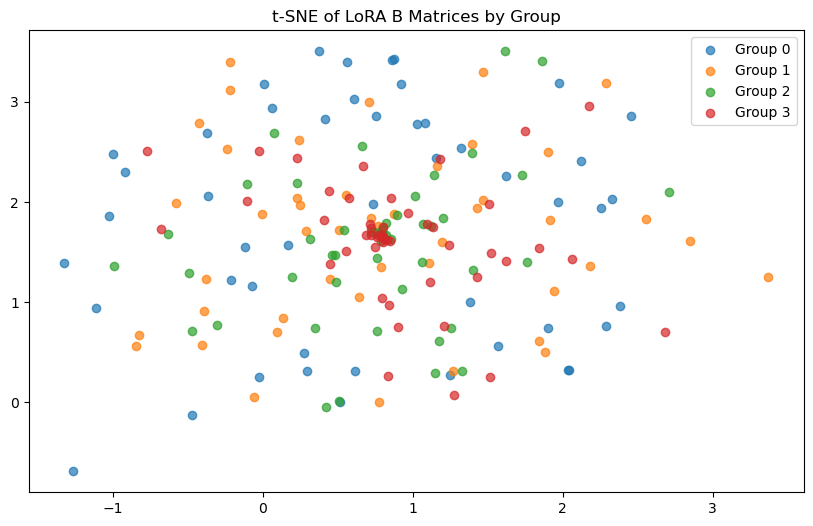

In [5]:
from sklearn.preprocessing import StandardScaler
X_B_scaled = StandardScaler().fit_transform(X_B)

# 执行t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_B_scaled)

# 可视化（按组着色）
plt.figure(figsize=(10, 6))
for group_id in range(4):
    mask = groups == group_id
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                label=f"Group {group_id}", alpha=0.7)
plt.title("t-SNE of LoRA B Matrices by Group")
plt.legend()
plt.show()

In [14]:
df_A = pd.read_csv("lora_A_matrices.csv")  # 或加载B矩阵

# 提取特征和标签
features = df_A.filter(regex='A_feature_').values  # (192, 8000)
labels = df_A['sub_lora_group'].values            # (192,)

In [15]:
# 数据标准化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [16]:
# t-SNE降维（关键参数固定随机种子）
tsne = TSNE(
    n_components=2,
    perplexity=25,      # 根据样本量调整（192样本建议20-30）
    n_iter=1500,        # 增加迭代次数确保收敛
    random_state=42,    # 固定随机性
    init='pca',         # 使用PCA初始化提升稳定性
    learning_rate=200   # 平衡速度与精度
)
tsne_result = tsne.fit_transform(features_scaled)

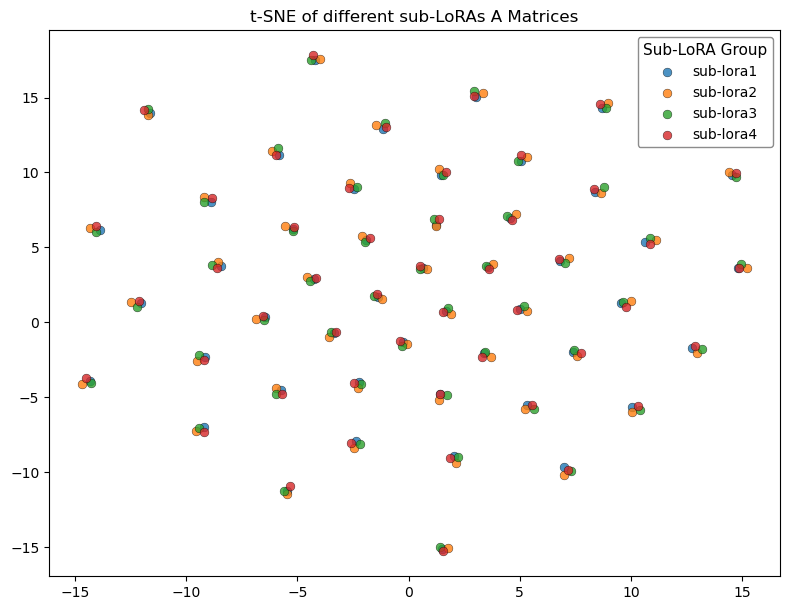

In [26]:
plt.figure(figsize=(8, 6))  # 标准期刊单栏宽度（~3.5英寸双栏）
colors = {
    'sub-lora1': '#1f77b4',  # 蓝色
    'sub-lora2': '#ff7f0e',  # 橙色
    'sub-lora3': '#2ca02c',  # 绿色
    'sub-lora4': '#d62728'   # 红色
}

# 按组绘制散点
for group in colors.keys():
    mask = labels == group
    plt.scatter(
        tsne_result[mask, 0], 
        tsne_result[mask, 1],
        s=40,                 # 点大小
        c=colors[group],
        label=group,
        alpha=0.8,            # 透明度防重叠
        edgecolor='k',        # 黑色边框增强辨识
        linewidth=0.3
    )


# 图例（位置优化）
plt.legend(
    title='Sub-LoRA Group',
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    framealpha=0.9,
    edgecolor='gray',
    loc='upper right'
)

# 调整布局防止标签溢出
plt.tight_layout()

# 保存高分辨率图像
# plt.savefig(
#     'tsne_lora_A.pdf',         # 矢量格式优先
#     dpi=600,                  # 位图备份时使用
#     bbox_inches='tight',       # 包含图例
#     transparent=False         # 背景透明可选
# )

plt.title("t-SNE of different sub-LoRAs A Matrices")
plt.show()



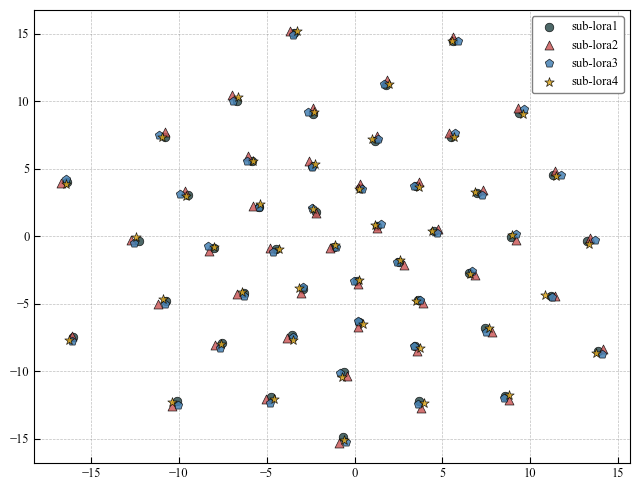

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import rcParams


rcParams.update({
    'font.family': 'serif',       # 常用衬线字体
    'font.serif': ['Times New Roman'],
    'font.size': 10,             # 正文字体大小
    'axes.labelsize': 11,         # 坐标轴标签
    'xtick.labelsize': 9,         # X轴刻度
    'ytick.labelsize': 9,         # Y轴刻度
    'axes.linewidth': 0.8,        # 坐标轴线宽
    'xtick.direction': 'in',      # 刻度线朝内
    'ytick.direction': 'in',      # 刻度线朝内
    'xtick.major.size': 4,        # 主刻度长度
    'ytick.major.size': 4,
    'xtick.major.width': 0.8,     # 刻度线宽
    'ytick.major.width': 0.8,
})

# 加载数据与预处理
df_A = pd.read_csv("lora_A_matrices.csv")
features = df_A.filter(regex='A_feature_').values
labels = df_A['sub_lora_group'].values

# 标准化与t-SNE (参数保持稳定)
tsne = TSNE(n_components=2, perplexity=25, n_iter=1500, random_state=42, init='pca')
tsne_result = tsne.fit_transform(StandardScaler().fit_transform(features))

# 图形参数定义
style_config = {
    "sub-lora1": {'color': '#2F4F4F', 'marker': 'o', 'size': 38},  # 圆形
    "sub-lora2": {'color': '#CD5C5C', 'marker': '^', 'size': 42},  # 三角形
    "sub-lora3": {'color': '#4682B4', 'marker': 'p', 'size': 40},  # 五边形
    "sub-lora4": {'color': '#DAA520', 'marker': '*', 'size': 50}   # 五角星
}

# 绘图
fig, ax = plt.subplots(figsize=(6.5, 5))  # Nature期刊常用尺寸

# 绘制每个类别的散点 (差异化标记)
for group in style_config.keys():
    mask = labels == group
    ax.scatter(
        x=tsne_result[mask, 0],
        y=tsne_result[mask, 1],
        s=style_config[group]['size'],
        facecolor=style_config[group]['color'],
        marker=style_config[group]['marker'],
        edgecolor='k',
        linewidths=0.5,
        alpha=0.85,
        label=group,
        zorder=3  # 确保标记在最上层
    )

# 封闭式坐标轴 (显示所有边框)
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(0.8)


legend = ax.legend(
    title_fontsize='10',
    fontsize=9,
    frameon=True,
    framealpha=1,
    edgecolor='gray',
    facecolor='white',
    loc='upper right',
)

# 网格线 (增强可读性)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='gray')

# 输出高质量图像
plt.tight_layout()
# plt.savefig('tsne_enhanced.pdf', dpi=600, bbox_inches='tight')
plt.show()

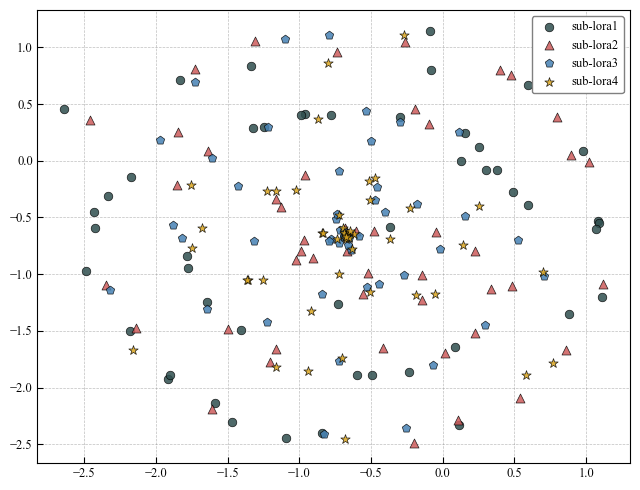

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import rcParams


rcParams.update({
    'font.family': 'serif',       # 常用衬线字体
    'font.serif': ['Times New Roman'],
    'font.size': 10,             # 正文字体大小
    'axes.labelsize': 11,         # 坐标轴标签
    'xtick.labelsize': 9,         # X轴刻度
    'ytick.labelsize': 9,         # Y轴刻度
    'axes.linewidth': 0.8,        # 坐标轴线宽
    'xtick.direction': 'in',      # 刻度线朝内
    'ytick.direction': 'in',      # 刻度线朝内
    'xtick.major.size': 4,        # 主刻度长度
    'ytick.major.size': 4,
    'xtick.major.width': 0.8,     # 刻度线宽
    'ytick.major.width': 0.8,
})

# 加载数据与预处理
df_A = pd.read_csv("lora_B_matrices.csv")
features = df_A.filter(regex='B_feature_').values
labels = df_A['sub_lora_group'].values

# 标准化与t-SNE (参数保持稳定)
tsne = TSNE(n_components=2, perplexity=25, n_iter=1500, random_state=42, init='pca')
tsne_result = tsne.fit_transform(StandardScaler().fit_transform(features))

# 图形参数定义
style_config = {
    "sub-lora1": {'color': '#2F4F4F', 'marker': 'o', 'size': 38},  # 圆形
    "sub-lora2": {'color': '#CD5C5C', 'marker': '^', 'size': 42},  # 三角形
    "sub-lora3": {'color': '#4682B4', 'marker': 'p', 'size': 40},  # 五边形
    "sub-lora4": {'color': '#DAA520', 'marker': '*', 'size': 50}   # 五角星
}

# 绘图
fig, ax = plt.subplots(figsize=(6.5, 5))  # Nature期刊常用尺寸

# 绘制每个类别的散点 (差异化标记)
for group in style_config.keys():
    mask = labels == group
    ax.scatter(
        x=tsne_result[mask, 0],
        y=tsne_result[mask, 1],
        s=style_config[group]['size'],
        facecolor=style_config[group]['color'],
        marker=style_config[group]['marker'],
        edgecolor='k',
        linewidths=0.5,
        alpha=0.85,
        label=group,
        zorder=3  # 确保标记在最上层
    )

# 封闭式坐标轴 (显示所有边框)
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(0.8)


legend = ax.legend(
    title_fontsize='10',
    fontsize=9,
    frameon=True,
    framealpha=1,
    edgecolor='gray',
    facecolor='white',
    loc='upper right',
)

# 网格线 (增强可读性)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='gray')

# 输出高质量图像
plt.tight_layout()
# plt.savefig('tsne_enhanced.pdf', dpi=600, bbox_inches='tight')
plt.show()

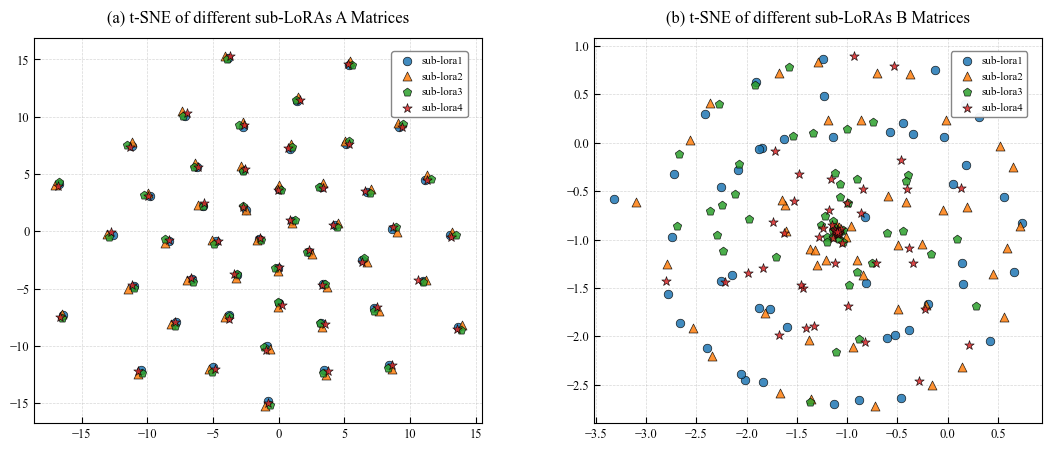

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import rcParams


rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'axes.linewidth': 0.8,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,
})

# 数据加载与处理函数
def load_data(prefix):
    df = pd.read_csv(f"lora_{prefix}_matrices.csv")
    features = df.filter(regex=f'{prefix}_feature_').values
    labels = df['sub_lora_group'].values
    return features, labels

features_A, labels_A = load_data('A')
features_B, labels_B = load_data('B')

# t-SNE处理函数
def run_tsne(features):
    return TSNE(
        n_components=2, perplexity=25, random_state=42, init='pca'
    ).fit_transform(StandardScaler().fit_transform(features))

tsne_A = run_tsne(features_A)
tsne_B = run_tsne(features_B)

# 可视化配置
style_config = {
    "sub-lora1": {'color': '#1f77b4', 'marker': 'o', 'size': 38},
    "sub-lora2": {'color': '#ff7f0e', 'marker': '^', 'size': 42},
    "sub-lora3": {'color': '#2ca02c', 'marker': 'p', 'size': 40},
    "sub-lora4": {'color': '#d62728', 'marker': '*', 'size': 50}
}

# 创建独立坐标系的双子图
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(13, 5),
    gridspec_kw={'wspace': 0.25}  # 增加子图间距
)

def plot_panel(ax, data, labels, title):
    # 绘制数据点
    for group in style_config.keys():
        mask = labels == group
        ax.scatter(
            data[mask, 0], data[mask, 1],
            s=style_config[group]['size'],
            c=style_config[group]['color'],
            marker=style_config[group]['marker'],
            edgecolor='k',
            linewidth=0.5,
            alpha=0.85,
            label=group,
            zorder=3
        )
    
    # 坐标轴设置
    ax.set_title(title, fontsize=12, pad=12)
    
    # 封闭边框与网格
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.8)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    
    # 添加独立图例（右上角）
    ax.legend(
        title_fontsize=9,
        fontsize=8,
        frameon=True,
        framealpha=0.95,
        edgecolor='gray',
        loc='upper right',
        bbox_to_anchor=(0.98, 0.98),  # 微调位置避免接触边框
        handletextpad=0.3
    )

# 绘制两个子图
plot_panel(ax1, tsne_A, labels_A, "(a) t-SNE of different sub-LoRAs A Matrices")
plot_panel(ax2, tsne_B, labels_B, "(b) t-SNE of different sub-LoRAs B Matrices")

# 保存输出
plt.savefig(
    'AB_tsne_independent.pdf',
    dpi=600,
    bbox_inches='tight',
    transparent=False
)
plt.show()